In [1]:
#imports
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import pickle
import random
import time


%matplotlib inline
sns.set()

In [2]:
with open('last_three_seasons.pkl', 'rb') as picklefile:
    pdata = pickle.load(picklefile)    

In [3]:
len(pdata)

1711

In [4]:
pdata.count()

Name                 1711
Height               1711
Weight               1711
Draft Position       1711
Career Earnings      1711
Current Season(C)    1711
C_Experience         1711
C_Age                1711
C_Tm                 1711
C_Lg                 1711
C_Pos                1711
C_G                  1711
C_GS                 1711
C_MP                 1711
C_FG                 1711
C_FGA                1711
C_FG%                1703
C_3P                 1711
C_3PA                1711
C_3P%                1569
C_2P                 1711
C_2PA                1711
C_2P%                1687
C_eFG%               1703
C_FT                 1711
C_FTA                1711
C_FT%                1629
C_ORB                1711
C_DRB                1711
C_TRB                1711
                     ... 
Ca_FT%               1679
Ca_ORB               1711
Ca_DRB               1711
Ca_TRB               1711
Ca_AST               1711
Ca_STL               1711
Ca_BLK               1711
Ca_TOV      

In [5]:
pdata[pdata['C_FG%'].isnull()]

,Name,Height,Weight,Draft Position,Career Earnings,Current Season(C),C_Experience,C_Age,C_Tm,C_Lg,...,Ca_TOV%,Ca_USG%,Ca_OWS,Ca_DWS,Ca_WS,Ca_WS/48,Ca_OBPM,Ca_DBPM,Ca_BPM,Ca_VORP
481,Tyler Lydon,82,215,24,0,2017-18,1,21,DEN,NBA,...,NaN,0.0,0.0,0.0,0.0,-0.014,-5.7,-0.8,-6.5,0.0
23,Trey McKinney-Jones,77,214,0,0,2017-18,1,27,IND,NBA,...,NaN,0.0,0.0,0.0,0.0,-0.001,-5.8,-0.1,-5.9,0.0
233,Danuel House,79,207,0,543471,2016-17,1,23,WAS,NBA,...,7.2,16.1,0.4,0.2,0.6,0.066,-1.3,-1.5,-2.8,-0.1
432,Sam Dekker,81,230,18,3366960,2015-16,1,21,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.090,-1.1,-0.7,-1.8,0.1
451,Ben Moore,79,203,0,0,2017-18,1,22,IND,NBA,...,NaN,0.0,0.0,0.0,0.0,0.072,-5.3,0.3,-5.0,0.0
233,Danuel House,79,207,0,543471,2016-17,1,23,WAS,NBA,...,7.2,16.1,0.4,0.2,0.6,0.066,-1.3,-1.5,-2.8,-0.1
432,Sam Dekker,81,230,18,3366960,2015-16,1,21,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.090,-1.1,-0.7,-1.8,0.1
451,Ben Moore,79,203,0,0,2017-18,1,22,IND,NBA,...,NaN,0.0,0.0,0.0,0.0,0.072,-5.3,0.3,-5.0,0.0


In [6]:
pdata[pdata['Name'] == 'Sam Dekker']

,Name,Height,Weight,Draft Position,Career Earnings,Current Season(C),C_Experience,C_Age,C_Tm,C_Lg,...,Ca_TOV%,Ca_USG%,Ca_OWS,Ca_DWS,Ca_WS,Ca_WS/48,Ca_OBPM,Ca_DBPM,Ca_BPM,Ca_VORP
430,Sam Dekker,81,230,18,3366960,2017-18,3,23,LAC,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
431,Sam Dekker,81,230,18,3366960,2016-17,2,22,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
432,Sam Dekker,81,230,18,3366960,2015-16,1,21,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
430,Sam Dekker,81,230,18,3366960,2017-18,3,23,LAC,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
431,Sam Dekker,81,230,18,3366960,2016-17,2,22,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
432,Sam Dekker,81,230,18,3366960,2015-16,1,21,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1


In [7]:
# drop duplicate rows - 1711 -> 1290 rows - why?  set should have gotten rid of duplicate links
Z = pdata.drop_duplicates(keep='first')
len(Z)

1290

In [8]:
#confirm duplicates gone
Z[Z['Name'] == 'Sam Dekker']

,Name,Height,Weight,Draft Position,Career Earnings,Current Season(C),C_Experience,C_Age,C_Tm,C_Lg,...,Ca_TOV%,Ca_USG%,Ca_OWS,Ca_DWS,Ca_WS,Ca_WS/48,Ca_OBPM,Ca_DBPM,Ca_BPM,Ca_VORP
430,Sam Dekker,81,230,18,3366960,2017-18,3,23,LAC,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
431,Sam Dekker,81,230,18,3366960,2016-17,2,22,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1
432,Sam Dekker,81,230,18,3366960,2015-16,1,21,HOU,NBA,...,9.1,15.1,2.5,1.8,4.3,0.09,-1.1,-0.7,-1.8,0.1


In [9]:
# dropped empty columns in place
Z.drop(columns=['Ca_Pos', 'Ca_Age', 'Ca_Tm'], inplace=True)
Z.shape

/home/douglas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1290, 155)

In [10]:
# 239 rookie records - explains difference in previous season and current season counts
len(Z[Z['C_Experience'] == 1]) 

239

In [11]:
# Prev season 3P% is 0 because they never made an attempt
Z.loc[(Z['P_3P%'].isnull()) & (Z['C_Experience'].isin([2,3]))][['Name', 'Current Season(C)','P_3P%']].head()

,Name,Current Season(C),P_3P%
21,Cameron Bairstow,2015-16,NaN
49,Julius Randle,2015-16,NaN
87,Alan Williams,2016-17,NaN
127,Lucas Nogueira,2015-16,NaN
144,Boban Marjanovic,2017-18,NaN


In [12]:
# Prev season 3P% is 0 because they never made an attempt
Z[(Z['P_TOV%'].isnull()) & (Z['C_Experience'].isin([2,3]))][['Name', 'Current Season(C)','P_3P%']]

,Name,Current Season(C),P_3P%
232,Danuel House,2017-18,NaN
431,Sam Dekker,2016-17,NaN


In [13]:
#239 rookies
rook = Z[Z['C_Experience'] == 1]

In [14]:
#unintended missing values for rookies
rook.count()[(rook.count()<239) & (rook.count()>0)]

C_FG%      234
C_3P%      206
C_2P%      231
C_eFG%     234
C_FT%      211
C_TS%      234
C_3PAr     234
C_FTr      234
C_TOV%     234
Ca_FG%     236
Ca_3P%     213
Ca_2P%     233
Ca_eFG%    236
Ca_FT%     216
Ca_TS%     236
Ca_3PAr    236
Ca_FTr     236
Ca_TOV%    236
dtype: int64

In [15]:
rook.columns[(rook.count()<239) & (rook.count()>0)]

Index(['C_FG%', 'C_3P%', 'C_2P%', 'C_eFG%', 'C_FT%', 'C_TS%', 'C_3PAr',
       'C_FTr', 'C_TOV%', 'Ca_FG%', 'Ca_3P%', 'Ca_2P%', 'Ca_eFG%', 'Ca_FT%',
       'Ca_TS%', 'Ca_3PAr', 'Ca_FTr', 'Ca_TOV%'],
      dtype='object')

In [16]:
#fill in missing values for rookies 
for col in rook.columns[(rook.count()<239) & (rook.count()>0)]:
    rook[col] = rook.loc[:,col].fillna(0)

/home/douglas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#fill na's with 0 since know they were blank cells
vet = Z[Z['C_Experience'] > 1].fillna(0)

In [18]:
#recombine dataframes with 0s filled in
players = pd.concat([rook, vet])
len(players)

1290

In [19]:
players.columns[10:20]

Index(['C_Pos', 'C_G', 'C_GS', 'C_MP', 'C_FG', 'C_FGA', 'C_FG%', 'C_3P',
       'C_3PA', 'C_3P%'],
      dtype='object')

In [20]:
players['C_Pos'].unique()

array(['PG', 'C', 'SG', 'PF', 'SF', 'PF-C', 'PG-SG', 'SF-SG', 'SG-SF'],
      dtype=object)

In [21]:
#players.getdummies()

# Subset likely columns

In [22]:
C1 = players[['Weight', 'Height', 'Draft Position', 'C_Age', 'C_MP', 'C_3P%', 'C_TRB', 'C_PTS', 'C_WS', 'C_VORP', 'C_Salary']]

In [23]:
C1.head()

,Weight,Height,Draft Position,C_Age,C_MP,C_3P%,C_TRB,C_PTS,C_WS,C_VORP,C_Salary
4,195,72,0,22,294,0.379,1.1,2.9,0.2,-0.1,543471
8,240,83,28,20,29,0.000,1.2,0.9,0.0,-0.1,1414920
26,206,78,12,21,1463,0.415,2.4,7.6,2.6,0.2,2759280
29,185,75,14,21,698,0.324,1.5,5.0,1.4,0.1,2021520
33,220,82,35,20,516,0.000,4.4,5.6,1.2,0.1,950000


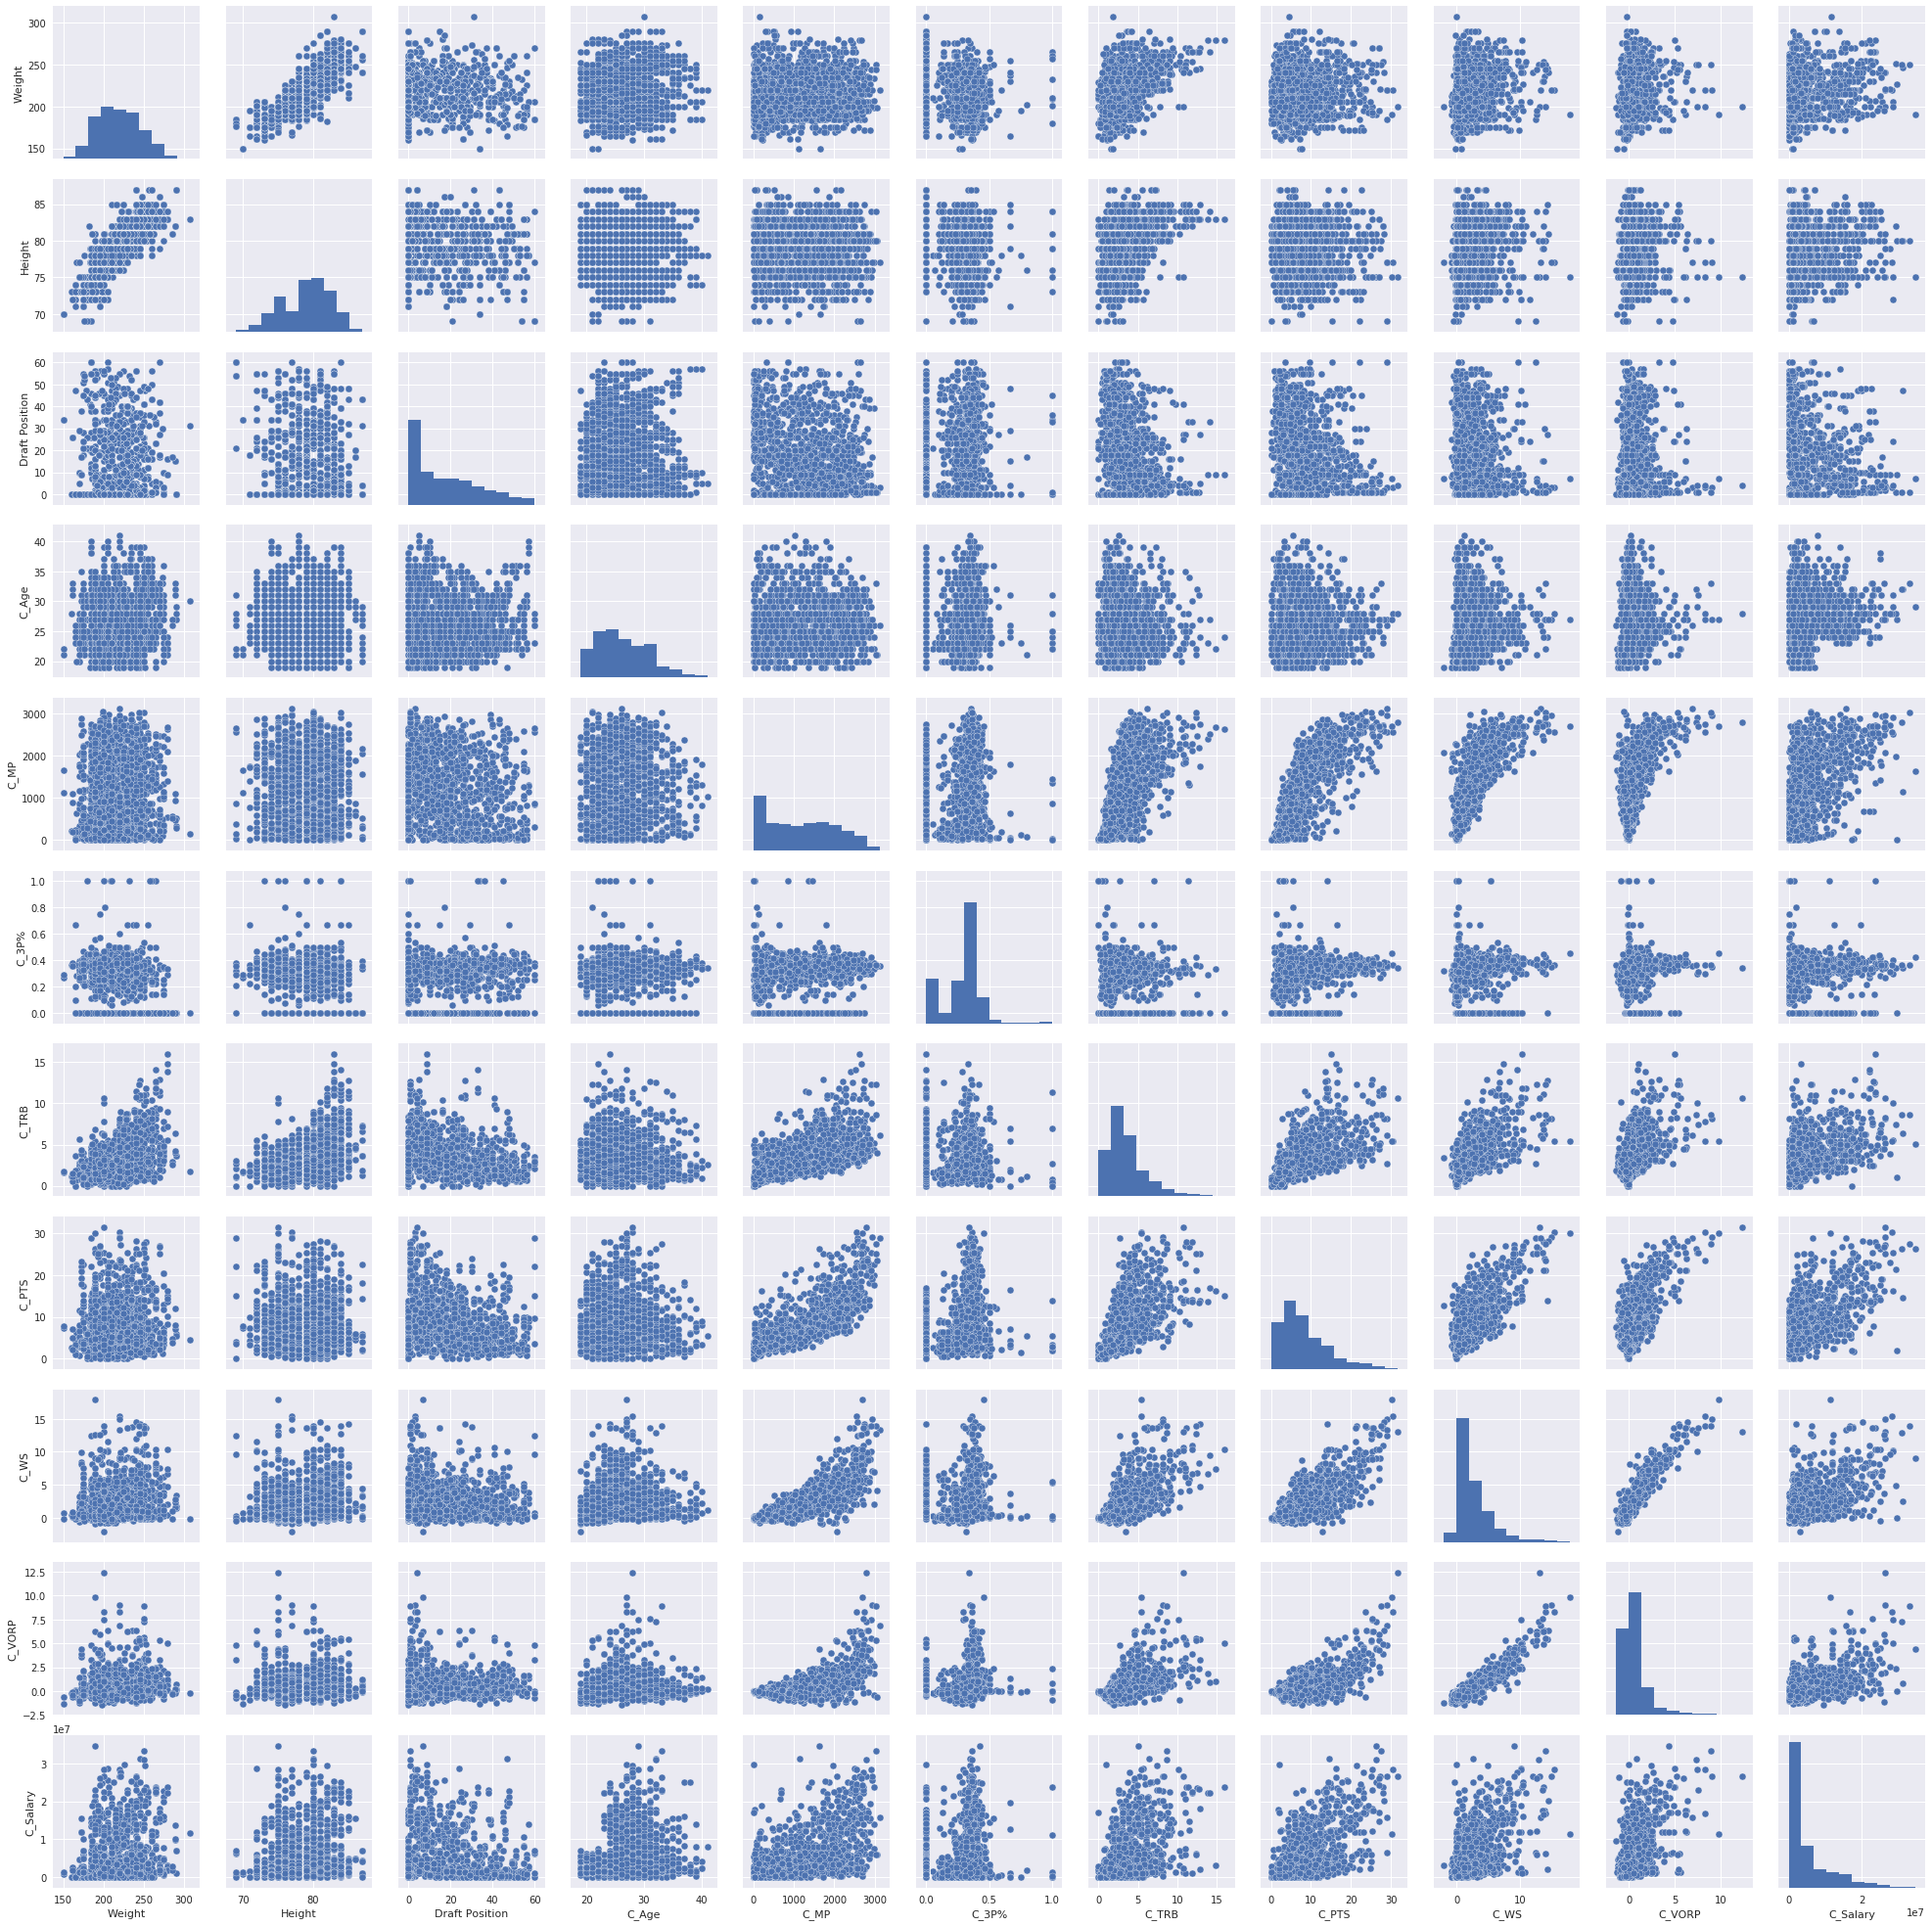

In [24]:
sns.pairplot(C1)

In [25]:
#change undrafted position from 0 to 61
players['Draft Position'] = players['Draft Position'].replace(0, 61)

In [26]:
d = pd.get_dummies(players[['Current Season(C)', 'C_Pos']])
d.columns

Index(['Current Season(C)_2015-16', 'Current Season(C)_2016-17',
       'Current Season(C)_2017-18', 'C_Pos_C', 'C_Pos_PF', 'C_Pos_PF-C',
       'C_Pos_PG', 'C_Pos_PG-SG', 'C_Pos_SF', 'C_Pos_SF-SG', 'C_Pos_SG',
       'C_Pos_SG-SF'],
      dtype='object')

In [27]:
players = pd.concat([players, d], axis=1)

In [28]:
players.head()

,Name,Height,Weight,Draft Position,Career Earnings,Current Season(C),C_Experience,C_Age,C_Tm,C_Lg,...,Current Season(C)_2017-18,C_Pos_C,C_Pos_PF,C_Pos_PF-C,C_Pos_PG,C_Pos_PG-SG,C_Pos_SF,C_Pos_SF-SG,C_Pos_SG,C_Pos_SG-SF
4,Fred VanVleet,72,195,61,543471,2016-17,1,22,TOR,NBA,...,0,0,0,0,1,0,0,0,0,0
8,Tony Bradley,83,240,28,0,2017-18,1,20,UTA,NBA,...,1,1,0,0,0,0,0,0,0,0
26,Luke Kennard,78,206,12,0,2017-18,1,21,DET,NBA,...,1,0,0,0,0,0,0,0,1,0
29,Cameron Payne,75,185,14,4134000,2015-16,1,21,OKC,NBA,...,0,0,0,0,1,0,0,0,0,0
33,Ivan Rabb,82,220,35,0,2017-18,1,20,MEM,NBA,...,1,0,1,0,0,0,0,0,0,0


In [29]:
C2 = players[['Draft Position', 'C_Age', 'C_MP', 'C_TRB', 'C_PTS', 'C_VORP', 'C_Pos_C', 'C_Pos_PF', 'C_Pos_PG', 'C_Pos_SF', 'C_Pos_SG', 'C_Salary']]

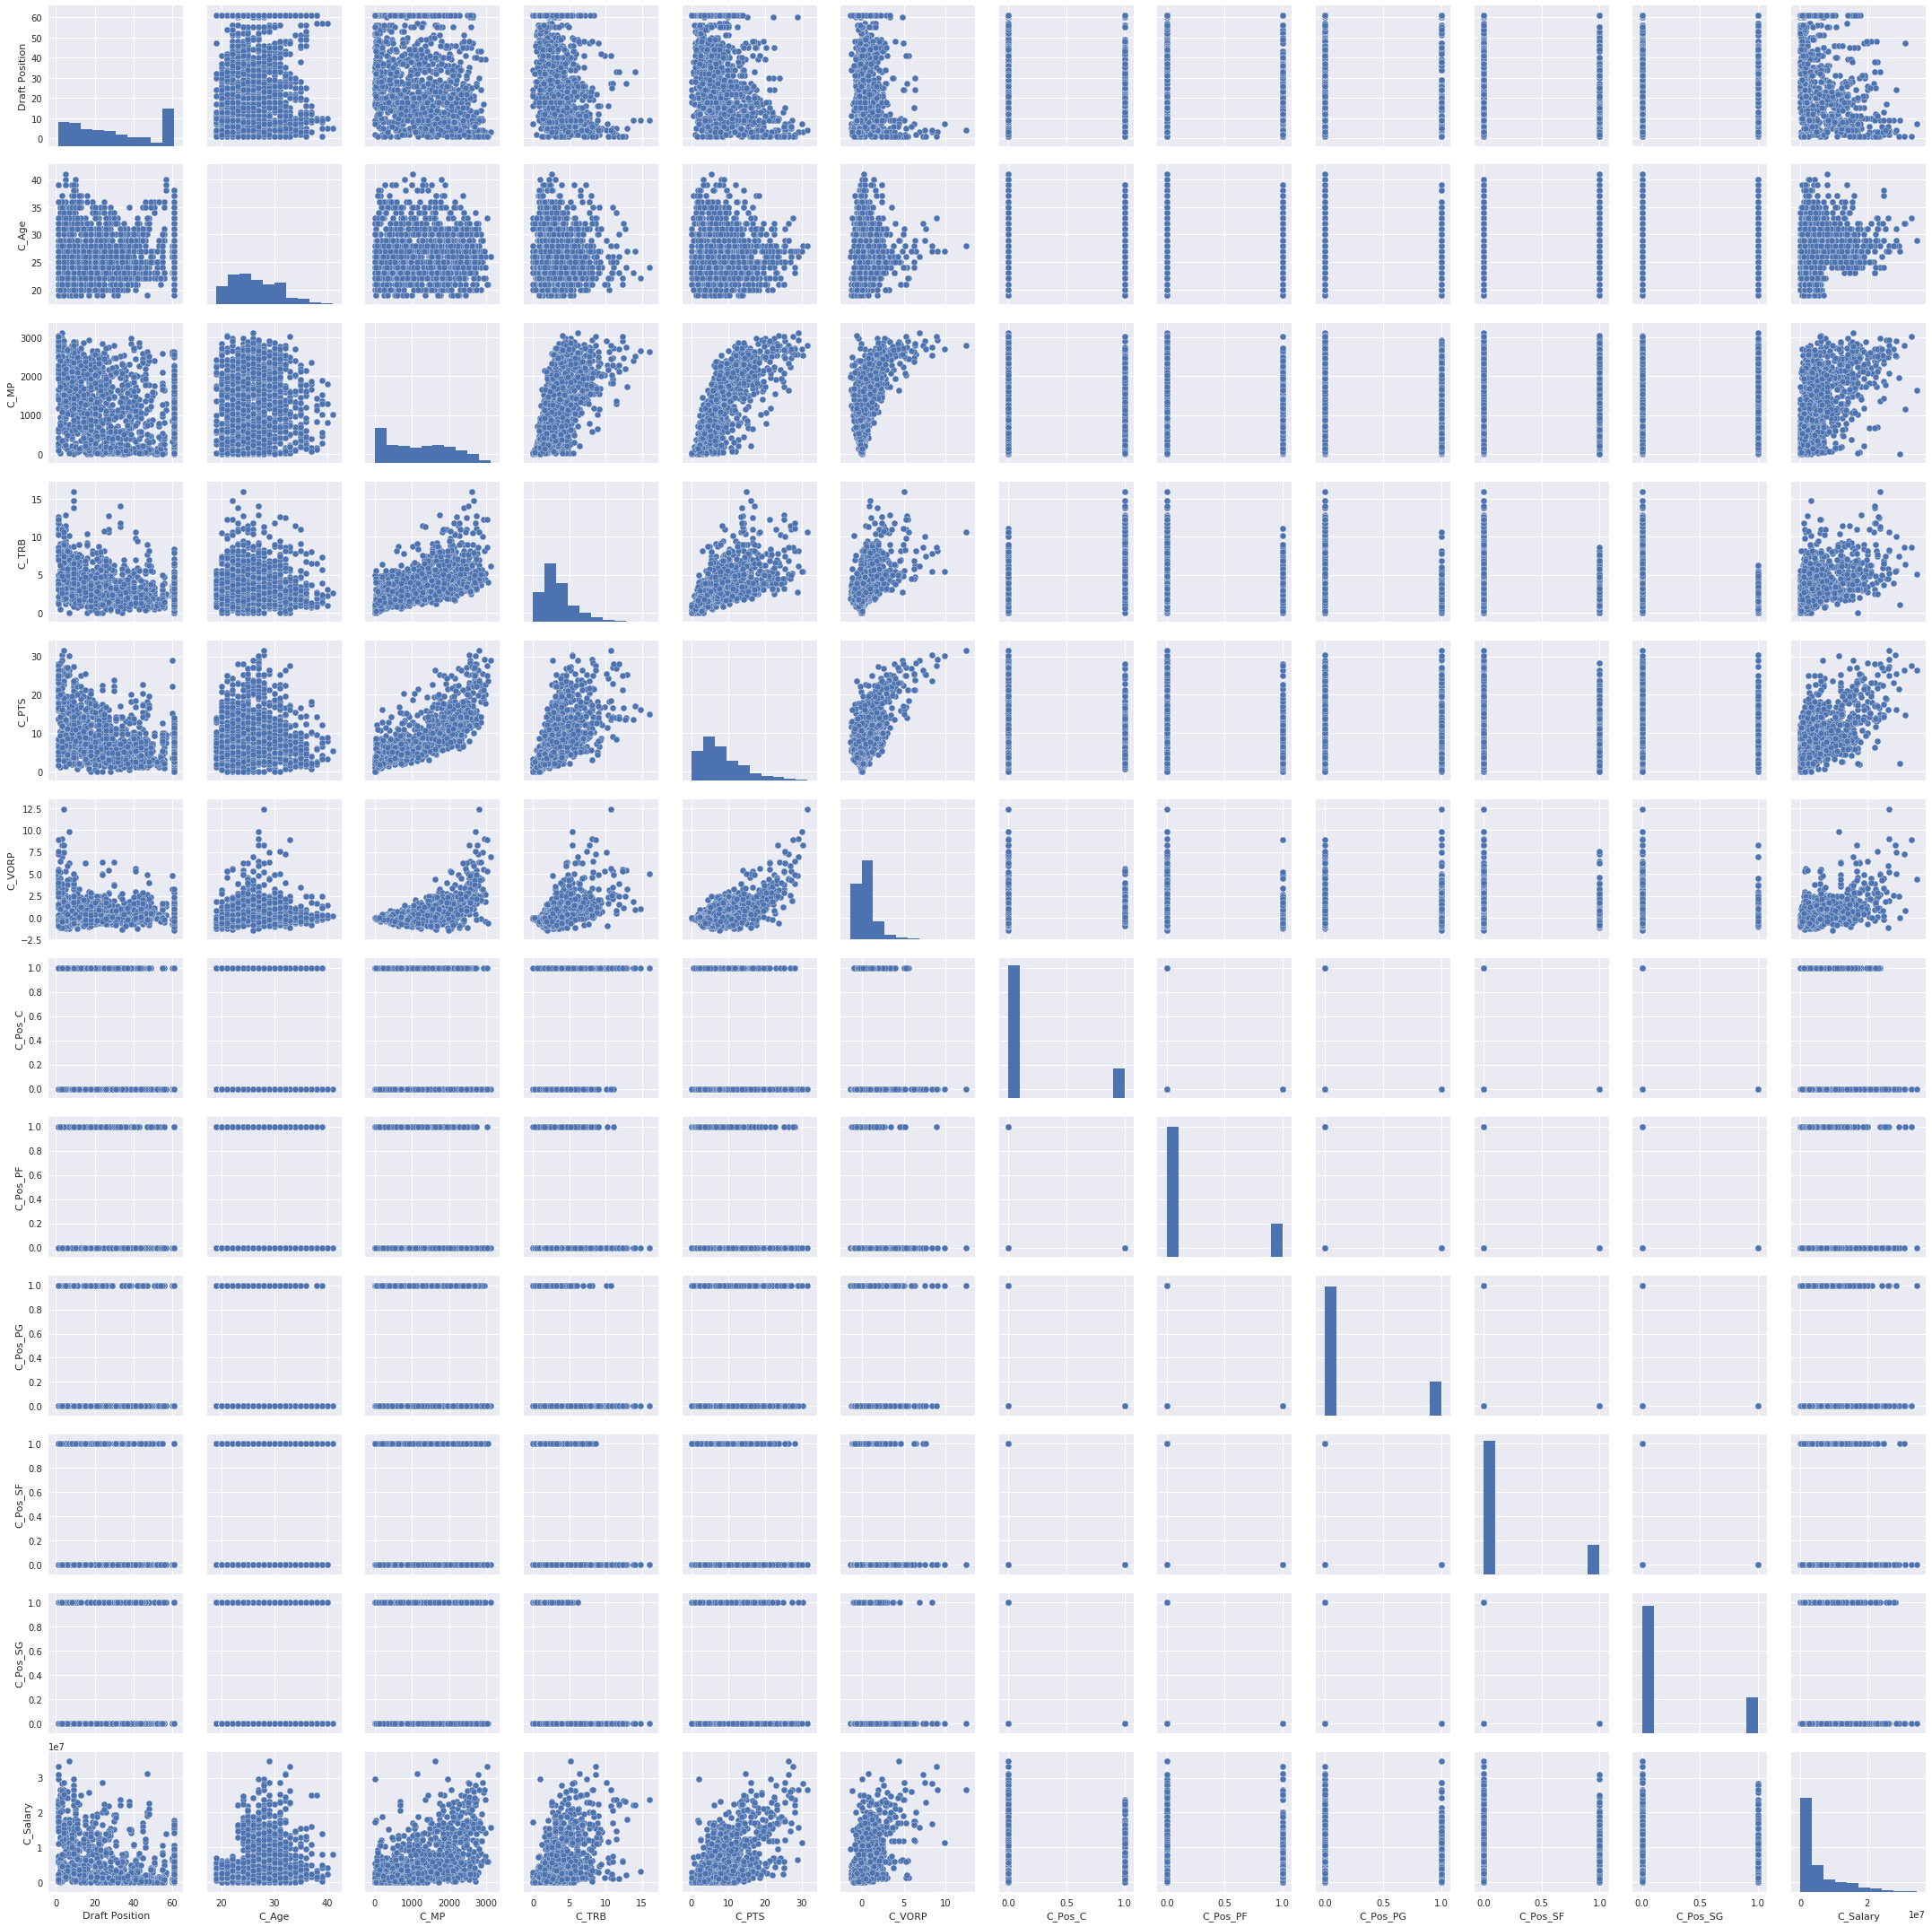

In [30]:
sns.pairplot(C2)

In [31]:
list(players.columns)

['Name',
 'Height',
 'Weight',
 'Draft Position',
 'Career Earnings',
 'Current Season(C)',
 'C_Experience',
 'C_Age',
 'C_Tm',
 'C_Lg',
 'C_Pos',
 'C_G',
 'C_GS',
 'C_MP',
 'C_FG',
 'C_FGA',
 'C_FG%',
 'C_3P',
 'C_3PA',
 'C_3P%',
 'C_2P',
 'C_2PA',
 'C_2P%',
 'C_eFG%',
 'C_FT',
 'C_FTA',
 'C_FT%',
 'C_ORB',
 'C_DRB',
 'C_TRB',
 'C_AST',
 'C_STL',
 'C_BLK',
 'C_TOV',
 'C_PF',
 'C_PTS',
 'C_PER',
 'C_TS%',
 'C_3PAr',
 'C_FTr',
 'C_ORB%',
 'C_DRB%',
 'C_TRB%',
 'C_AST%',
 'C_STL%',
 'C_BLK%',
 'C_TOV%',
 'C_USG%',
 'C_OWS',
 'C_DWS',
 'C_WS',
 'C_WS/48',
 'C_OBPM',
 'C_DBPM',
 'C_BPM',
 'C_VORP',
 'C_Salary',
 'Prev_Season(P)',
 'P_Experience',
 'P_Age',
 'P_Tm',
 'P_Lg',
 'P_Pos',
 'P_G',
 'P_GS',
 'P_MP',
 'P_FG',
 'P_FGA',
 'P_FG%',
 'P_3P',
 'P_3PA',
 'P_3P%',
 'P_2P',
 'P_2PA',
 'P_2P%',
 'P_eFG%',
 'P_FT',
 'P_FTA',
 'P_FT%',
 'P_ORB',
 'P_DRB',
 'P_TRB',
 'P_AST',
 'P_STL',
 'P_BLK',
 'P_TOV',
 'P_PF',
 'P_PTS',
 'P_PER',
 'P_TS%',
 'P_3PAr',
 'P_FTr',
 'P_ORB%',
 'P_DRB%',
 'P_TR

In [32]:
C3 = players[['Career Earnings', 'C_GS', 'C_PER', 'C_Experience', 'C_Salary']]

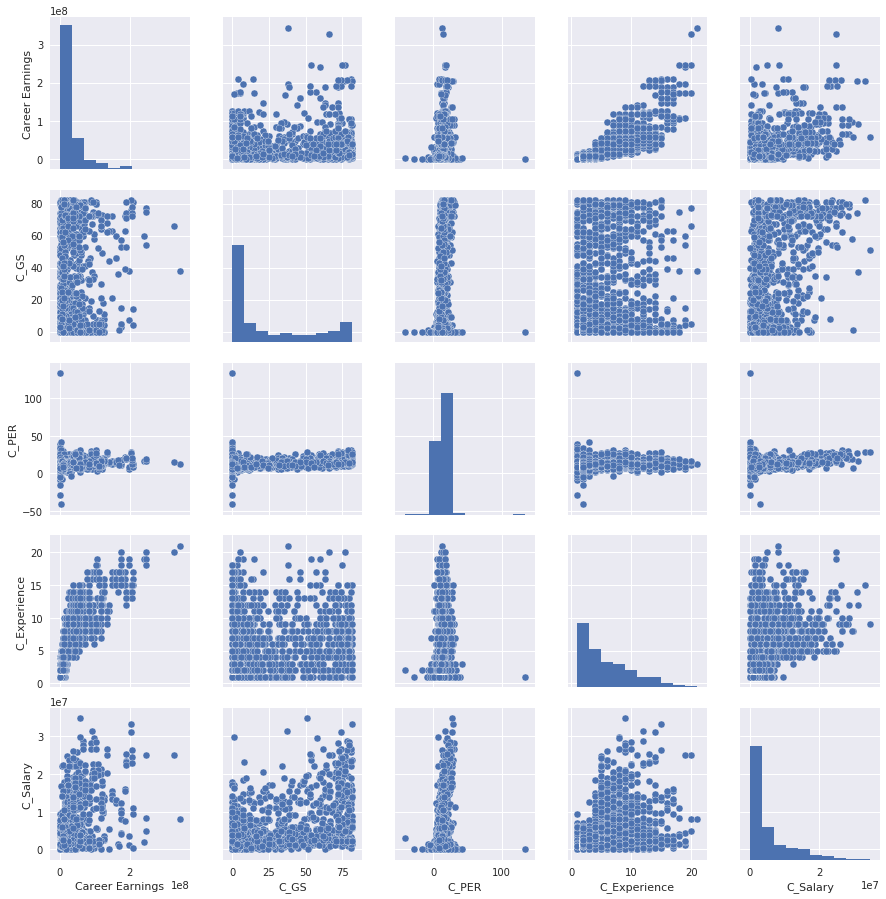

In [33]:
sns.pairplot(C3)

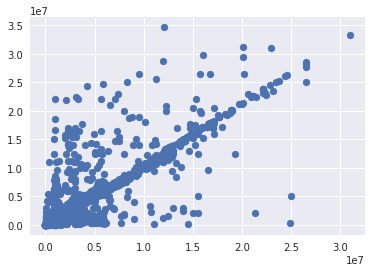

In [34]:
plt.scatter(players['P_Salary'], players['C_Salary'])

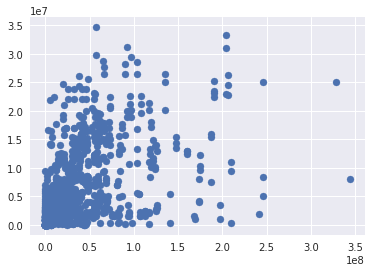

In [35]:
plt.scatter(players['Career Earnings'], players['C_Salary'])

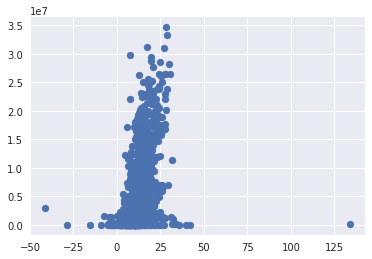

In [36]:
plt.scatter(players['C_PER'], players['C_Salary'])

In [37]:
PER_outliers = (players['C_PER'] > 50) | (players['C_PER'] < -25)

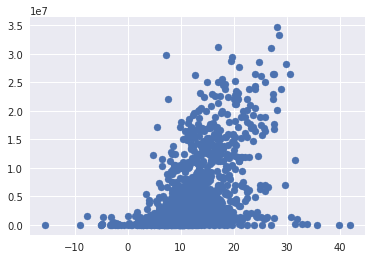

In [38]:
plt.scatter(players[~PER_outliers]['C_PER'], [players[~PER_outliers]['C_Salary']])

In [39]:
players[players['C_PER'] > 30]

,Name,Height,Weight,Draft Position,Career Earnings,Current Season(C),C_Experience,C_Age,C_Tm,C_Lg,...,Current Season(C)_2017-18,C_Pos_C,C_Pos_PF,C_Pos_PF-C,C_Pos_PG,C_Pos_PG-SG,C_Pos_SF,C_Pos_SF-SG,C_Pos_SG,C_Pos_SG-SF
99,Demetrius Jackson,73,201,45,1450000,2016-17,1,22,BOS,NBA,...,0,0,0,0,1,0,0,0,0,0
256,Thanasis Antetokounmpo,79,205,51,105888,2015-16,1,23,NYK,NBA,...,0,0,0,0,0,0,1,0,0,0
449,Edmond Sumner,78,176,52,0,2017-18,1,22,IND,NBA,...,1,0,0,0,1,0,0,0,0,0
61,Naz Mitrou-Long,76,209,61,0,2017-18,1,24,UTA,NBA,...,1,0,0,0,0,0,0,0,1,0
95,Vince Hunter,80,208,61,35000,2017-18,1,23,MEM,NBA,...,1,0,1,0,0,0,0,0,0,0
188,Rakeem Christmas,81,250,36,2052342,2015-16,1,24,IND,NBA,...,0,0,1,0,0,0,0,0,0,0
135,Anthony Brown,79,210,34,1734128,2017-18,3,25,MIN,NBA,...,1,0,0,0,0,0,1,0,0,0
447,David Stockton,71,165,61,29843,2017-18,2,26,UTA,NBA,...,1,0,0,0,1,0,0,0,0,0
440,Russell Westbrook,75,200,4,103715492,2016-17,9,28,OKC,NBA,...,0,0,0,0,1,0,0,0,0,0
35,Jarnell Stokes,81,263,35,1720059,2016-17,3,23,DEN,NBA,...,0,1,0,0,0,0,0,0,0,0


drop PER outliers
likely culprits 
rookie - less than

In [40]:
#drop rookies, bench warmers, injured
dr = players[~((players['C_G'] < 5) & (players['C_MP'] < 10))]

In [41]:
dr.shape


(1261, 167)

In [42]:
#drop 0's in C-Salary - nonsense
dz = dr[dr['C_Salary'] != 0]

In [43]:
dz.shape

(1203, 167)

In [45]:
dz['log_C_Salary'] = np.log(dz['C_Salary'])

/home/douglas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


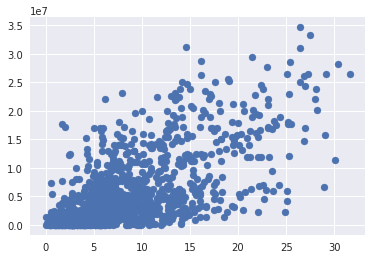

In [46]:
plt.scatter(dr['C_PTS'], dr['C_Salary'])

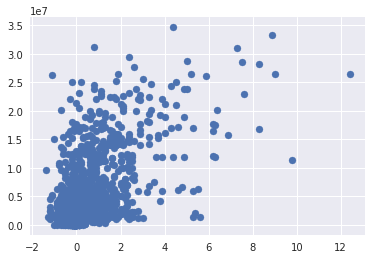

In [47]:
plt.scatter(dr['C_VORP'], dr['C_Salary'])

In [ ]:
dr[dr['C_VORP'] > 12]

In [ ]:
aa = np.log(dr['C_Salary'] + 1)

In [ ]:
sns.distplot(aa)

In [ ]:
ab = np.log(dz['C_Salary'])
sns.distplot(ab)

In [ ]:
np.log(5000000)

In [ ]:
pp = dz[['Draft Position', 'C_Age', 'C_MP', 'C_TRB', 'C_PTS', 'C_VORP', 'C_Pos_C', 'C_Pos_PF', 'C_Pos_PG', 'C_Pos_SF', 'C_Pos_SG', 'C_Salary', 'log_C_Salary']]

In [ ]:
#check transformed 
sns.pairplot(pp)

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
dz.sample(10)